# Prevendo a Ocorrência de Câncer

Para resolver este problema vamos usar como base de dados o Dataset breast_cancer do pacote datasets da biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

## Importando as bibliotecas e Dataframe

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_cancer = load_breast_cancer()
df = pd.DataFrame(df_cancer.data, columns=df_cancer.feature_names)
df["class"] = df_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Removendo colunas "error" e "worst"

for col in df.columns:
    if("mean" not in col) and (col != "class"):
        del df[col]

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [4]:
# Removendo o termo "mean" nos nomes das colunas

df.columns = [x.replace("mean ", "") for x in df.columns]
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


## Análise Exploratória

A Primeria tarefa a se fazer é checar os tipos de dados presentes em cada coluna do nosso dataset.

In [5]:
df.dtypes

radius               float64
texture              float64
perimeter            float64
area                 float64
smoothness           float64
compactness          float64
concavity            float64
concave points       float64
symmetry             float64
fractal dimension    float64
class                  int32
dtype: object

Obtendo uma descrição estatística dos dados

In [6]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


Para vários algorítmos de Machine Learning é importante que a variável "target" esteja balanceada.
Vamos verificar a quantidade de registros para cada classe presente na variável "class".

In [7]:
df.groupby("class").size()

class
0    212
1    357
dtype: int64

Como podemos observar, o dataset está levemente desbalanceado. Mas, como o número de registros de ambas as classes estão na mesma ordem de grandeza, não iremos rebalancear as classes.

### Matriz de correlação

In [8]:
correlations = df.corr()
correlations

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,class
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,-0.730029
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,-0.415185
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,-0.742636
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,-0.708984
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,-0.358560
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,-0.596534
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,-0.696360
concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,-0.776614
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,-0.330499
fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.012838


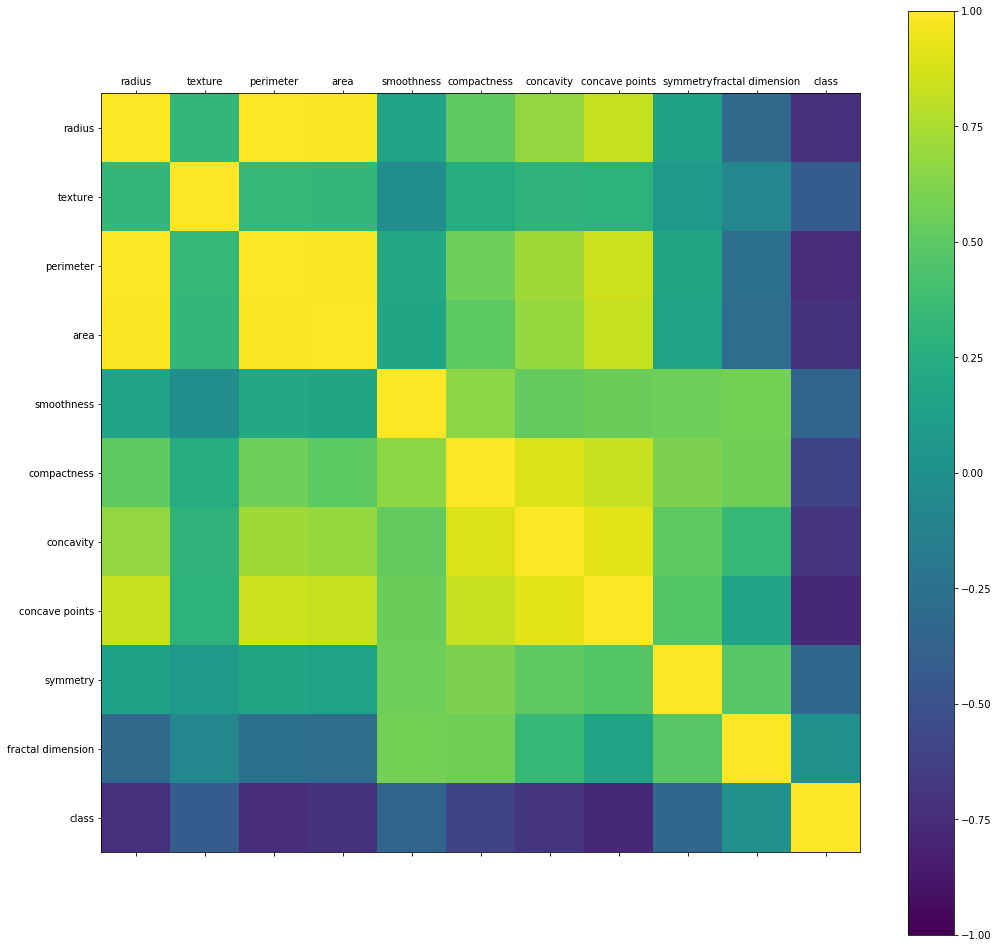

In [9]:
fig = plt.figure(figsize=[17,17])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

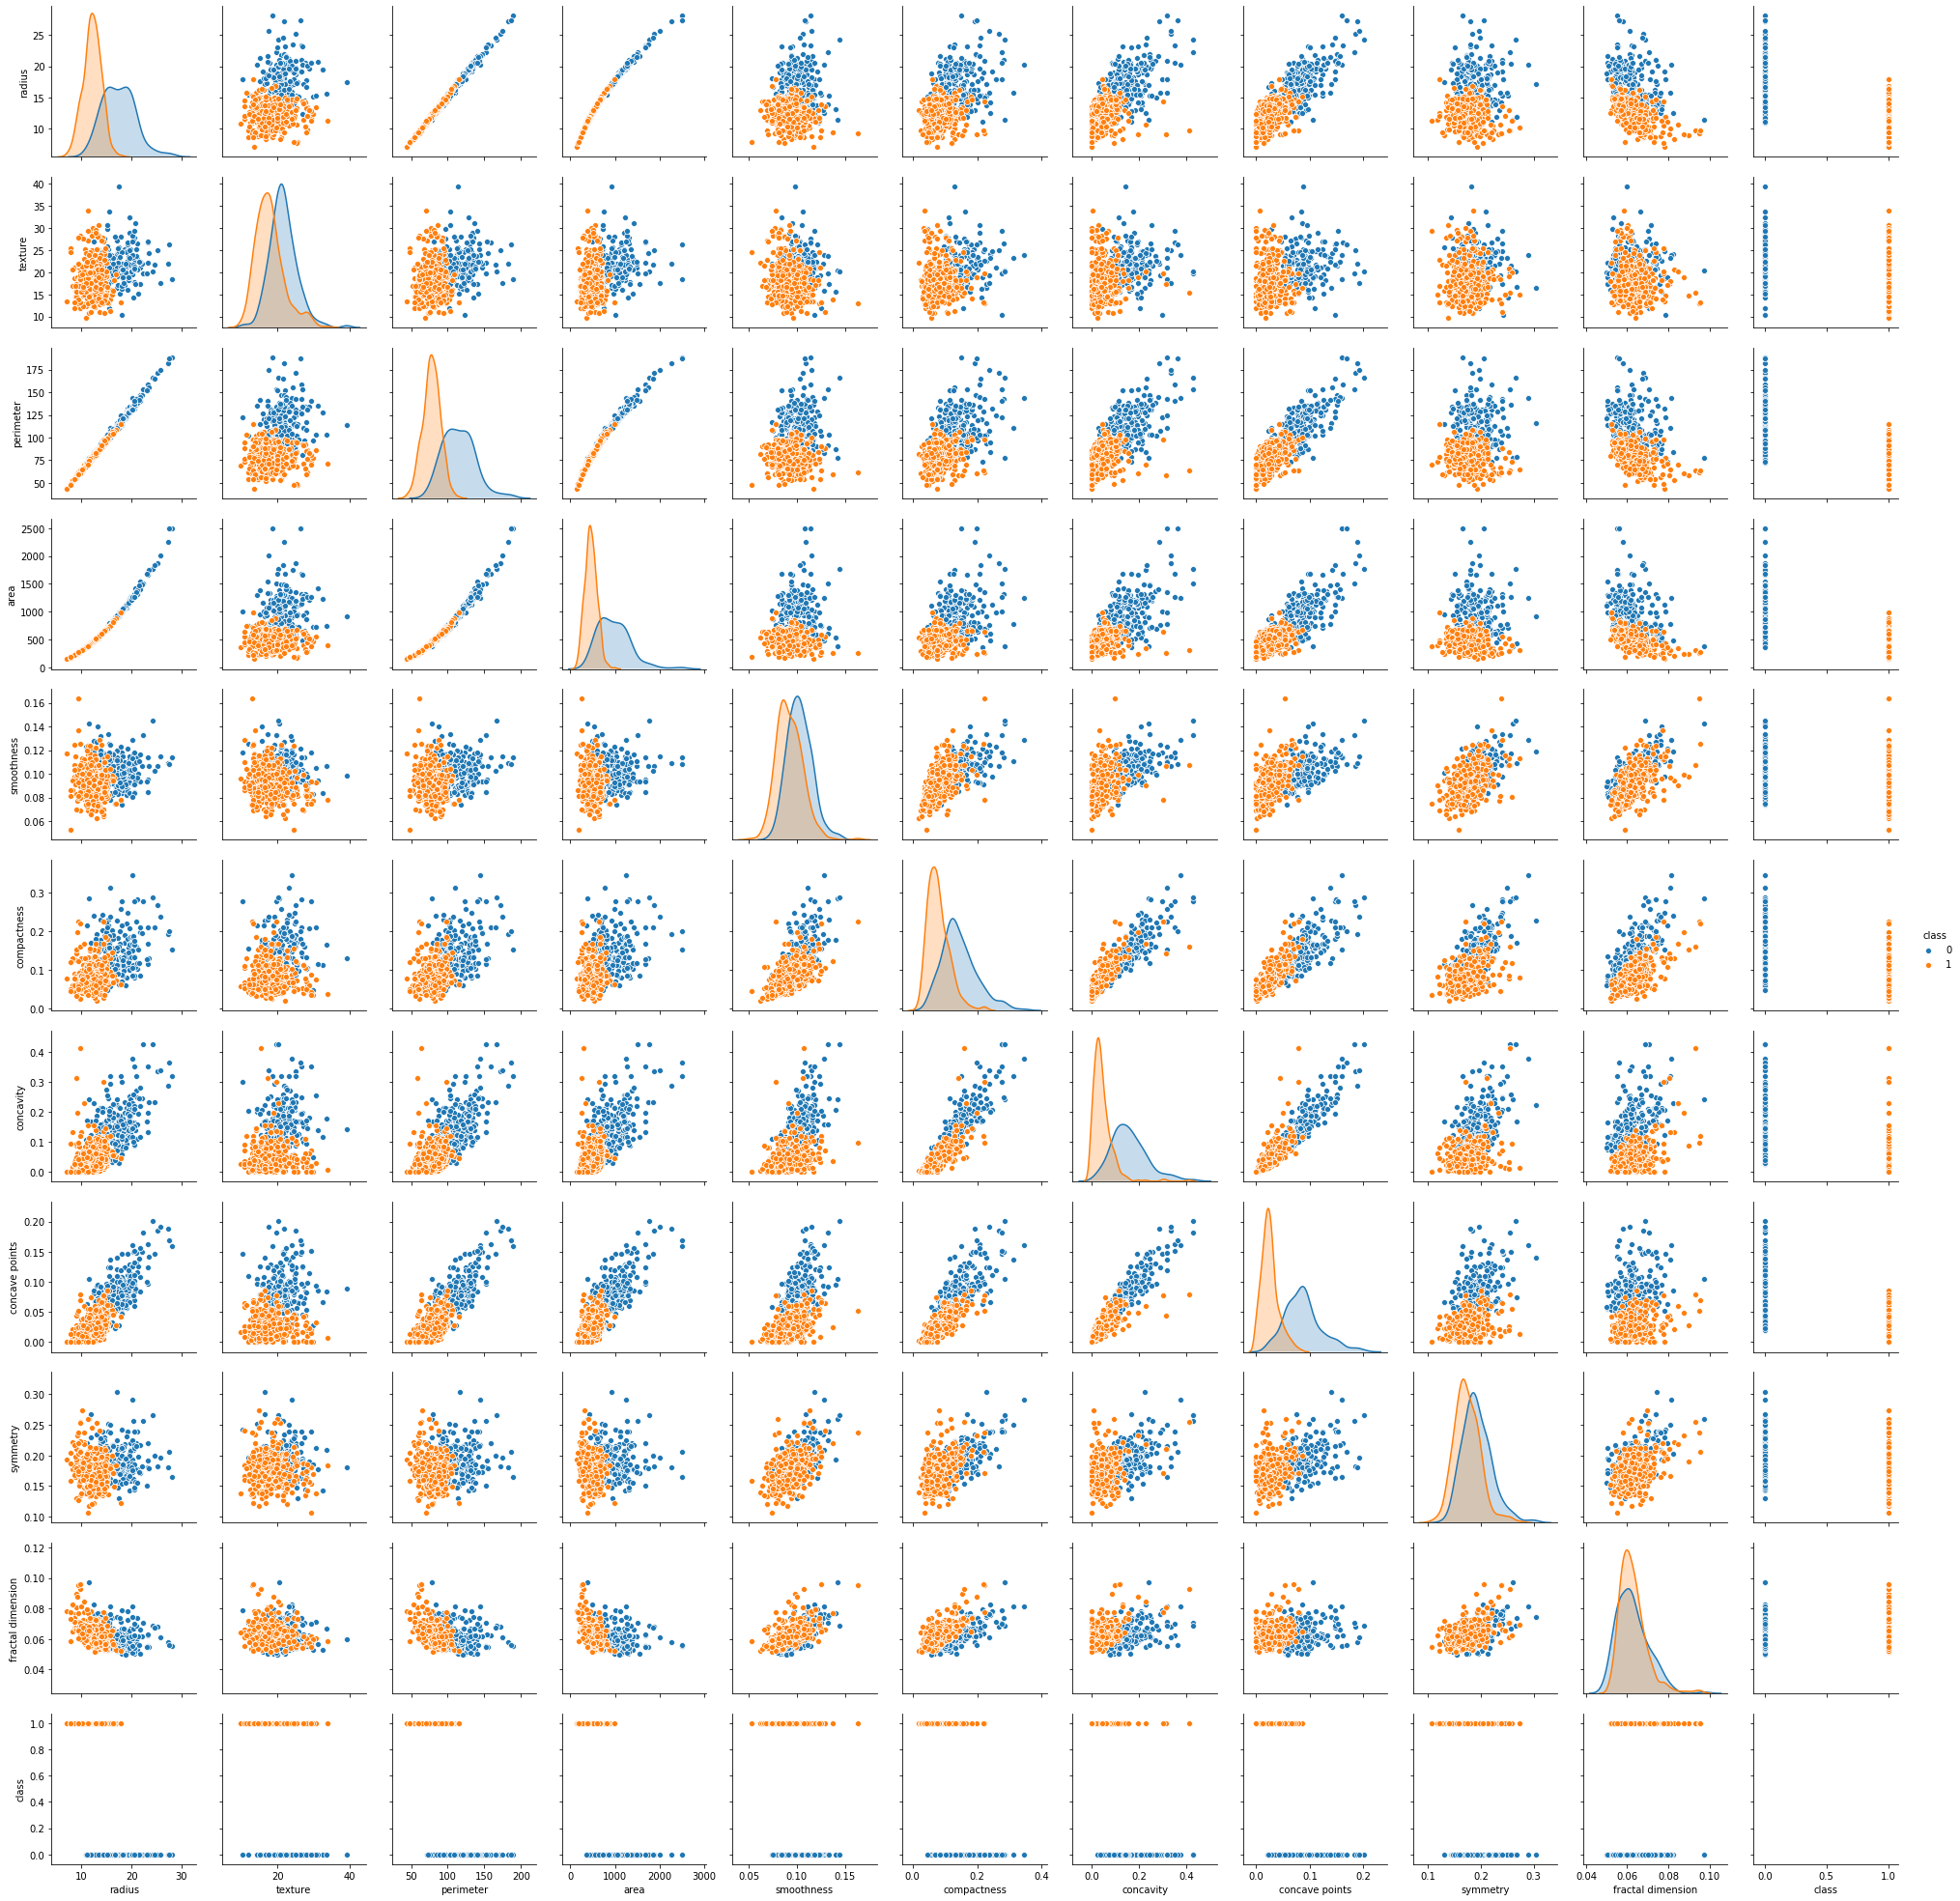

In [10]:
sns.pairplot(df, hue="class")

No gráfico acima podemos notar que os pontos de dados são facilmente divisíveis entre benígnos e malígnos. Isso nos dá indícios de que um modelo de árvores de decisão poderá ser um bom modelo para o problema proposto.

## Pré-pocessamento dos dados

In [11]:
df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


### Normalização

Como podemos notar acima, os dados encontram-se em diferentes ordens de grandeza. A fim de evitar algum tipo de enviezamento por parte dos algoritmos que testaremos, iremos normalizar os dados, colocando-os numa mesma escala (de 0 a 1).

In [12]:
from sklearn.preprocessing import MinMaxScaler

x = df.iloc[:, :10]
y = df.iloc[:, 10]

scaler = MinMaxScaler()
new_x = scaler.fit_transform(x)

df_scaled = pd.DataFrame(new_x, columns=df.loc[: ,df.columns != "class"].columns)
df_scaled["class"] = y

df_scaled.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,class
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0


### Padronização

In [13]:
from sklearn.preprocessing import StandardScaler

x = df.iloc[:, :10]
y = df.iloc[:, 10]

scaler = StandardScaler()
new_x = scaler.fit_transform(x)

df_standard = pd.DataFrame(new_x, columns=df.loc[: ,df.columns != "class"].columns)
df_standard["class"] = y

df_standard.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,class
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,0


## Feature Selection

Feature Selection tem por objetivo selecionar as variáveis que tem maior impacto na precisão do resultado final.
Para isso, iremos utilizar a Eliminação Recursiva de Atributos que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

x = df.iloc[:, :10]
y = df.iloc[:, 10]

# Modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(estimator=modelo, n_features_to_select=4)
fs_fit = rfe.fit(x,y)

print("Variáveis Preditoras:", df.columns[0:10])
print("Variáveis Selecionadas: %s" % fs_fit.support_)
print("Ranking dos Atributos: %s" % fs_fit.ranking_)
print("Número de Melhores Atributos: %d" % fs_fit.n_features_)

Variáveis Preditoras: Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave points', 'symmetry', 'fractal dimension'],
      dtype='object')
Variáveis Selecionadas: [ True False  True False False False  True  True False False]
Ranking dos Atributos: [1 5 1 7 4 6 1 1 2 3]
Número de Melhores Atributos: 4


### Aplicando o Feature Selection

In [15]:
col_filter = list(fs_fit.support_)
col_filter.append(True)

fs_df = df.loc[:, col_filter]
fs_df_scaled = df_scaled.loc[:, col_filter]
fs_df_standard = df_standard.loc[:, col_filter]

df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


## Machine Learning

Agora iremos selecionar o modelo preditivo que usaremos para solucionar o problema. Para tal, testaremos os modelos de Regressão Logística, Árvore de Decisão, Naive Bayes e SVM. Além disso, estudaremos a eficácia de cada modelo para os dados originais, padronizados e normalizados com e sem Feature Selection. Usaremos a técnica de Cross Validation para selecionar a melhor combinação.

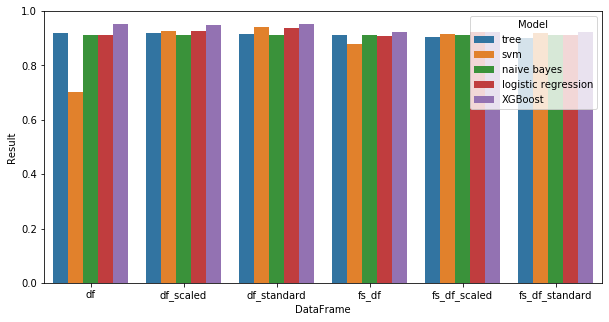

In [112]:
!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Datasets
dfs = [("df", df), ("df_scaled", df_scaled), ("df_standard", df_standard),
       ("fs_df", fs_df), ("fs_df_scaled", fs_df_scaled), ("fs_df_standard", fs_df_standard)]

# Models
models = [("tree", DecisionTreeClassifier()), ("svm", SVC()),
          ("naive bayes", GaussianNB()), ("logistic regression", LogisticRegression()), ("XGBoost", XGBClassifier())]

#Inputs (x) e outputs (y)
def train(dfs, models):
    n_folds = 5
    seed = 7
    results = []
    models_names = []
    df_names = []
    
    # Label Encoder
    label_encoder = LabelEncoder()
    
    for df_name, df in dfs:
        if "fs" in df_name:
            x = df.iloc[:, :4]
            y = label_encoder.fit_transform(df.iloc[:, 4])
        else:
            x = df.iloc[:, :10]
            y = label_encoder.fit_transform(df.iloc[:, 10])
        for model_name, model in models:
            kfolds = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
            cv_result = cross_val_score(model, x, y, cv=kfolds, scoring="accuracy")
            results.append(cv_result.mean())
            models_names.append(model_name)
            df_names.append(df_name)
    
    '''print(results)
    print(models_names)
    print(df_names)'''
        
    result_df = pd.DataFrame(data={"DataFrame":df_names,
                                  "Model":models_names,
                                  "Result":results},)
    
    plt.figure(figsize=[10,5])
    sns.barplot(x=result_df.DataFrame, y=result_df.Result, hue=result_df.Model, data=result_df)
    
    return result_df

result_df = train(dfs, models)
        

In [114]:
result_df

,DataFrame,Model,Result
0,df,tree,0.919221
1,df,svm,0.702950
2,df,naive bayes,0.912110
3,df,logistic regression,0.913864
4,df,XGBoost,0.952538
5,df_scaled,tree,0.919205
6,df_scaled,svm,0.926145
7,df_scaled,naive bayes,0.913864
8,df_scaled,logistic regression,0.926145
9,df_scaled,XGBoost,0.950784


In [113]:
best_fit = result_df[result_df.Result == result_df.Result.max()]
best_fit

,DataFrame,Model,Result
4,df,XGBoost,0.952538
14,df_standard,XGBoost,0.952538


Como podemos ver, o melhor modelo foi o XGBoost tanto com o dataset original quanto com o padronizado. Em ambos os casos, obtivemos uma acurácia de aproximadamente 95%.